In [2]:
import pandas as pd

# Read in file
df = pd.read_csv('ccdefault.csv')
df.head()
#df.shape

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


# Create feature and target arrays
y = df['DEFAULT'].values
X = df.drop('DEFAULT', axis=1).values
print('Class labels:', np.unique(y))

Class labels: [0 1]


In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
import time

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=1, stratify=y)

def rfc(n):
    time1 = time.time()
    
    # Instantiate rf
    rf = RandomForestClassifier(n_estimators=n, random_state=1)

    # Fit rf to the training set    
    rf.fit(X_train, y_train)

    # in-sample accuracy:
    cv_results = cross_val_score(rf, X_train, y_train, cv = 10, n_jobs = -1)
    
    print("\nn_estimators = ", n)
    #print("For In-sample accuracy for cv (k=10): ")
    #for i in cv_results:
    #    print("{:.4f}".format(i))
    print("\nIn-sample accuracy for cv (k=10): {:.4f}".format(np.mean(cv_results)))
    print("Standard Deviation : {:.4f}\n".format(np.std(cv_results)))

    # Predict test set labels
    y_pred_test = rf.predict(X_test)

    # out-sample accuracy:
    acc_out_sample = accuracy_score(y_test, y_pred_test)

    print("Out-of-sample accuracy for cv (k=10): {:.4f}".format(acc_out_sample))
    
    time2 = time.time()
    print ("Running time is " + str(time2-time1))
    

rfc(50)
rfc(100)
rfc(150)
rfc(200)
rfc(250)
rfc(300)


n_estimators =  50

In-sample accuracy for cv (k=10): 0.8159
Standard Deviation : 0.0060

Out-of-sample accuracy for cv (k=10): 0.8183
Running time is 15.662715911865234

n_estimators =  100

In-sample accuracy for cv (k=10): 0.8174
Standard Deviation : 0.0059

Out-of-sample accuracy for cv (k=10): 0.8217
Running time is 30.5605731010437

n_estimators =  150

In-sample accuracy for cv (k=10): 0.8173
Standard Deviation : 0.0056

Out-of-sample accuracy for cv (k=10): 0.8243
Running time is 46.05699110031128

n_estimators =  200

In-sample accuracy for cv (k=10): 0.8177
Standard Deviation : 0.0073

Out-of-sample accuracy for cv (k=10): 0.8250
Running time is 61.69332504272461

n_estimators =  250

In-sample accuracy for cv (k=10): 0.8181
Standard Deviation : 0.0070

Out-of-sample accuracy for cv (k=10): 0.8243
Running time is 76.21762204170227

n_estimators =  300

In-sample accuracy for cv (k=10): 0.8181
Standard Deviation : 0.0070

Out-of-sample accuracy for cv (k=10): 0.8240
Running t

 1) PAY_0                          0.094184
 2) ID                             0.072735
 3) AGE                            0.056384
 4) BILL_AMT1                      0.055589
 5) LIMIT_BAL                      0.051704
 6) BILL_AMT2                      0.050815
 7) BILL_AMT6                      0.048790
 8) BILL_AMT4                      0.048136
 9) BILL_AMT3                      0.047995
10) PAY_AMT1                       0.044700
11) BILL_AMT5                      0.044620
12) PAY_AMT5                       0.042024
13) PAY_AMT6                       0.041080
14) PAY_AMT2                       0.040995
15) PAY_AMT3                       0.040695
16) PAY_2                          0.039560
17) PAY_AMT4                       0.039350
18) PAY_3                          0.033601
19) PAY_5                          0.023199
20) PAY_4                          0.023128
21) PAY_6                          0.018690
22) EDUCATION                      0.018527
23) MARRIAGE                    

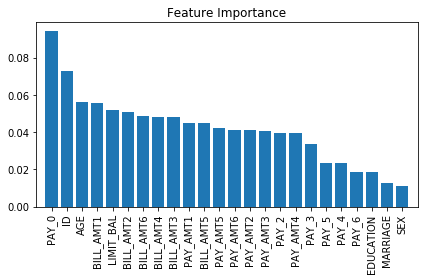

In [20]:
# feature importance：
import matplotlib.pyplot as plt


rf.fit(X_train, y_train)
feature_importances = rf.feature_importances_
#print(feature_importances)

# feature importances from random forest model
importances = rf.feature_importances_

# index of greatest to least feature importances
sorted_index = np.argsort(importances)[::-1]
    
# create tick labels
labels = np.array(feature_names)[sorted_index]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, df.columns[sorted_index[f]], importances[sorted_index[f]]))
    
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_index], tick_label=labels, align='center')
# rotate tick labels to vertical
plt.xticks(rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()


